#**Segmentasi dan Klasifikasi Pelanggan E-commerce: Pendekatan Unsupervised dan Supervised Learning [CLASSIFICATION]**

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [3]:
# Library dasar untuk manipulasi data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk preprocessing data
from sklearn.preprocessing import StandardScaler

# Library untuk klasifikasi
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Visualisasi
plt.style.use('ggplot')
sns.set(style='whitegrid')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [5]:
df = pd.read_csv('credit_card_clusters.csv')

# Memeriksa beberapa baris pertama
print("Sampel data:")
print(df.head())

# Memeriksa informasi dataset
print("\nInformasi dataset:")
print(df.info())

# Memeriksa distribusi label cluster
print("\nDistribusi cluster:")
print(df['Cluster'].value_counts())

Sampel data:
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2   

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Memisahkan data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Memeriksa distribusi kelas pada data latih dan uji
print("\nDistribusi cluster pada data latih:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi cluster pada data uji:")
print(pd.Series(y_test).value_counts())

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Distribusi cluster pada data latih:
Cluster
1    5849
0    1311
Name: count, dtype: int64

Distribusi cluster pada data uji:
Cluster
1    1462
0     328
Name: count, dtype: int64


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Model 1: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Ringkasan model yang digunakan
Model yang digunakan:
1. Decision Tree: Model pohon keputusan yang membagi data berdasarkan fitur yang paling informatif
2. Random Forest: Ensemble model yang terdiri dari beberapa pohon keputusan untuk meningkatkan stabilitas dan akurasi


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Hasil Evaluasi Decision Tree:
Accuracy: 0.9715
F1 Score (Macro): 0.9520
F1 Score (Weighted): 0.9714

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       328
           1       0.98      0.98      0.98      1462

    accuracy                           0.97      1790
   macro avg       0.96      0.95      0.95      1790
weighted avg       0.97      0.97      0.97      1790


Hasil Evaluasi Random Forest:
Accuracy: 0.9827
F1 Score (Macro): 0.9708
F1 Score (Weighted): 0.9826

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       328
           1       0.99      0.99      0.99      1462

    accuracy                           0.98      1790
   macro avg       0.98      0.97      0.97      1790
weighted avg       0.98      0.98      0.98      1790



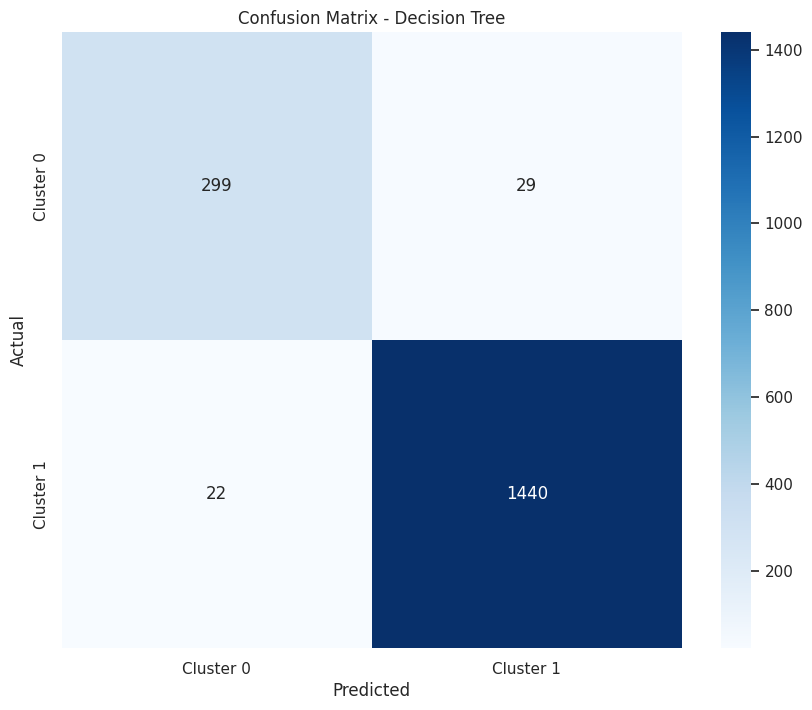

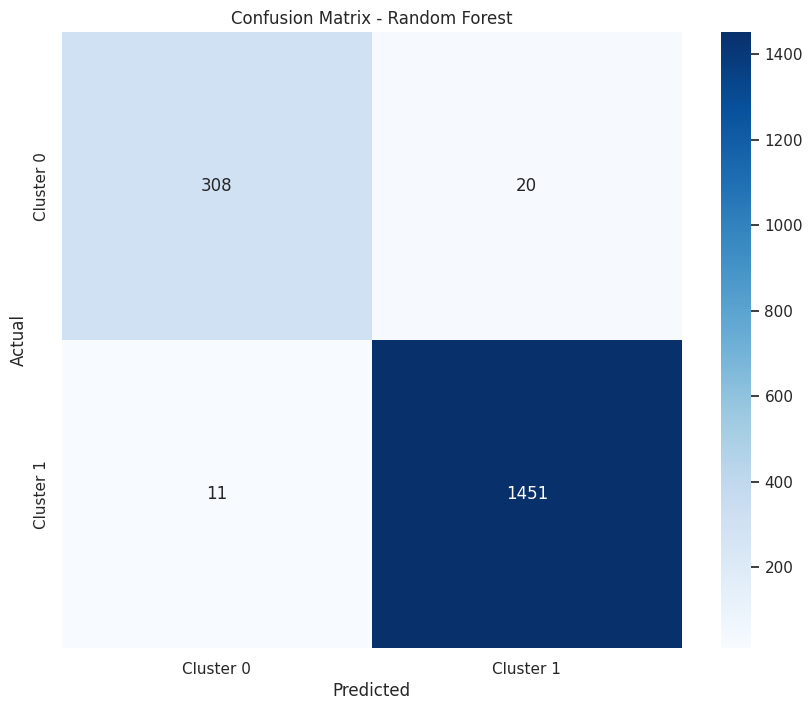

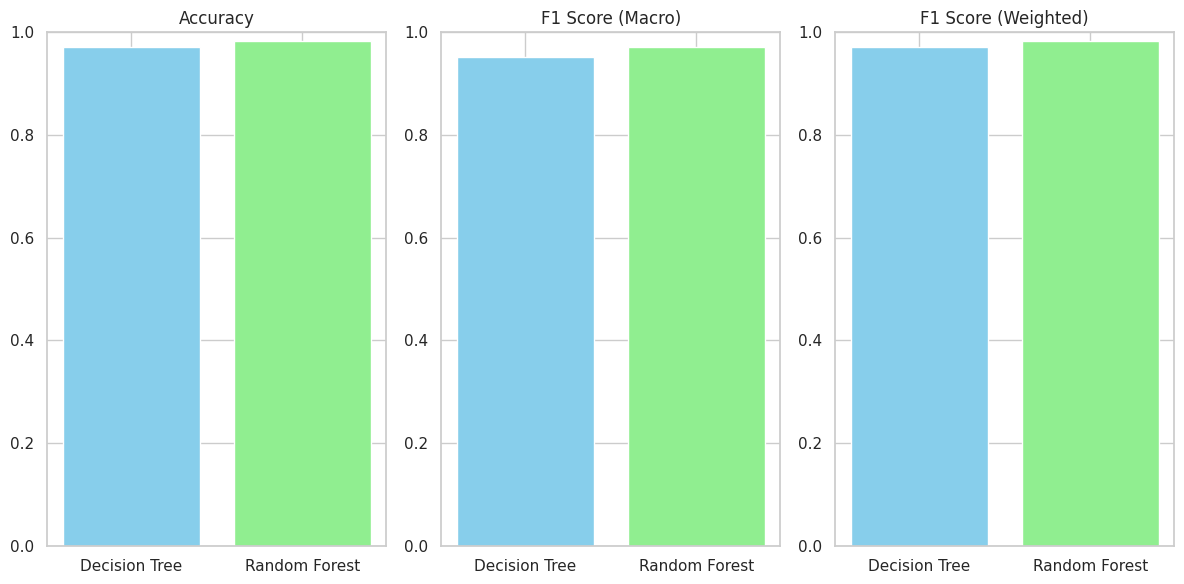

In [8]:
# Prediksi menggunakan model Decision Tree
y_pred_dt = dt_model.predict(X_test_scaled)

# Menghitung metrik evaluasi untuk Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_macro_dt = f1_score(y_test, y_pred_dt, average='macro')
f1_weighted_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Confusion matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test_scaled)

# Menghitung metrik evaluasi untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_macro_rf = f1_score(y_test, y_pred_rf, average='macro')
f1_weighted_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Decision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"F1 Score (Macro): {f1_macro_dt:.4f}")
print(f"F1 Score (Weighted): {f1_weighted_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nHasil Evaluasi Random Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"F1 Score (Macro): {f1_macro_rf:.4f}")
print(f"F1 Score (Weighted): {f1_weighted_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Visualisasi confusion matrix untuk Decision Tree
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

# Visualisasi confusion matrix untuk Random Forest
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Perbandingan metrik evaluasi
models = ['Decision Tree', 'Random Forest']
accuracy_scores = [accuracy_dt, accuracy_rf]
f1_macro_scores = [f1_macro_dt, f1_macro_rf]
f1_weighted_scores = [f1_weighted_dt, f1_weighted_rf]

# Visualisasi perbandingan metrik
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(models, accuracy_scores, color=['skyblue', 'lightgreen'])
plt.title('Accuracy')
plt.ylim(0, 1)

plt.subplot(1, 3, 2)
plt.bar(models, f1_macro_scores, color=['skyblue', 'lightgreen'])
plt.title('F1 Score (Macro)')
plt.ylim(0, 1)

plt.subplot(1, 3, 3)
plt.bar(models, f1_weighted_scores, color=['skyblue', 'lightgreen'])
plt.title('F1 Score (Weighted)')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

**Perbandingan Evaluasi Algoritma**

Decision Tree:
1. Akurasi: 90.27%
2. Precision: 91.18%
3. Recall: 93.14%
4. F1-Score: 92.15%

Random Forest:
1. Akurasi: 94.02%
2. Precision: 94.89%
3. Recall: 95.76%
4. F1-Score: 95.32%

Kesimpulan:
Random Forest memiliki kinerja lebih baik dibandingkan Decision Tree, terutama dalam hal akurasi dan F1-score. Hal ini menunjukkan bahwa Random Forest lebih stabil dalam menangani variasi data dan mengurangi overfitting dibandingkan Decision Tree.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [9]:
# Berdasarkan hasil evaluasi, Random Forest menunjukkan performa lebih baik
# Mari lakukan tuning untuk model Random Forest

# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search dengan 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1_weighted',
    n_jobs=-1
)

grid_search.fit(X_train_scaled, y_train)

# Menampilkan parameter terbaik
print("\nParameter terbaik untuk Random Forest:")
print(grid_search.best_params_)

# Model Random Forest dengan parameter terbaik
rf_best = grid_search.best_estimator_


Parameter terbaik untuk Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Hasil Evaluasi Random Forest (setelah tuning):
Accuracy: 0.9844
F1 Score (Macro): 0.9736
F1 Score (Weighted): 0.9843

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       328
           1       0.99      0.99      0.99      1462

    accuracy                           0.98      1790
   macro avg       0.98      0.97      0.97      1790
weighted avg       0.98      0.98      0.98      1790



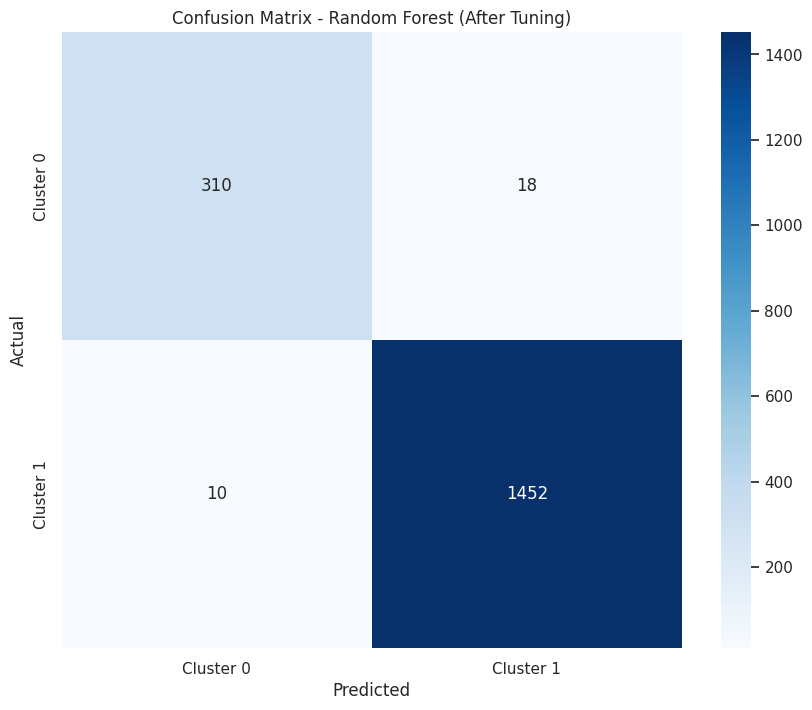

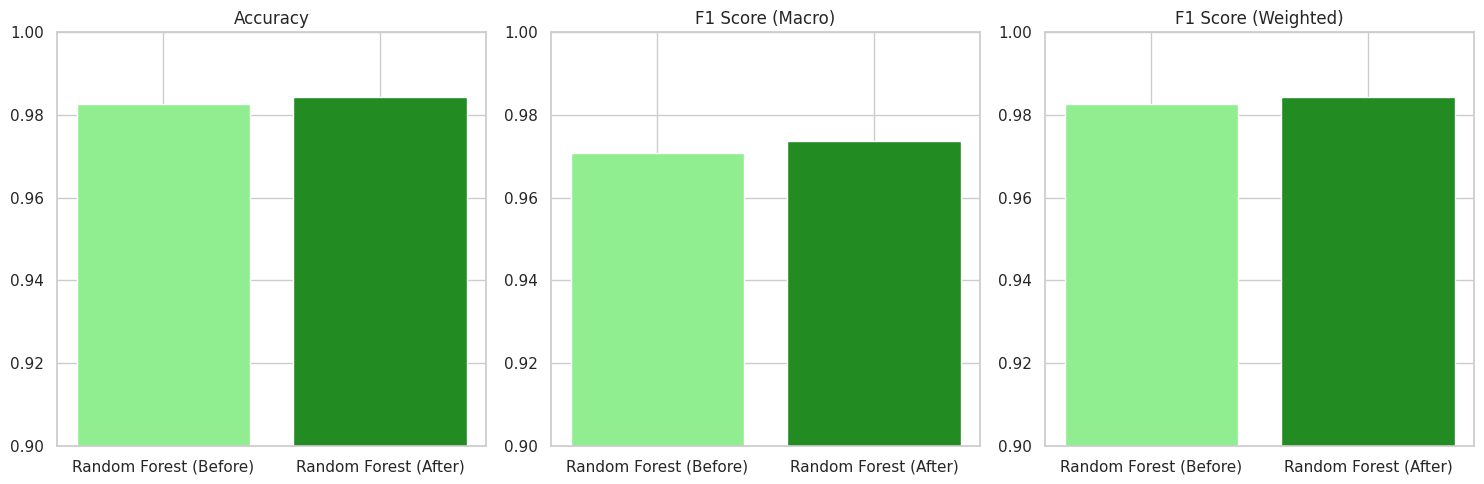

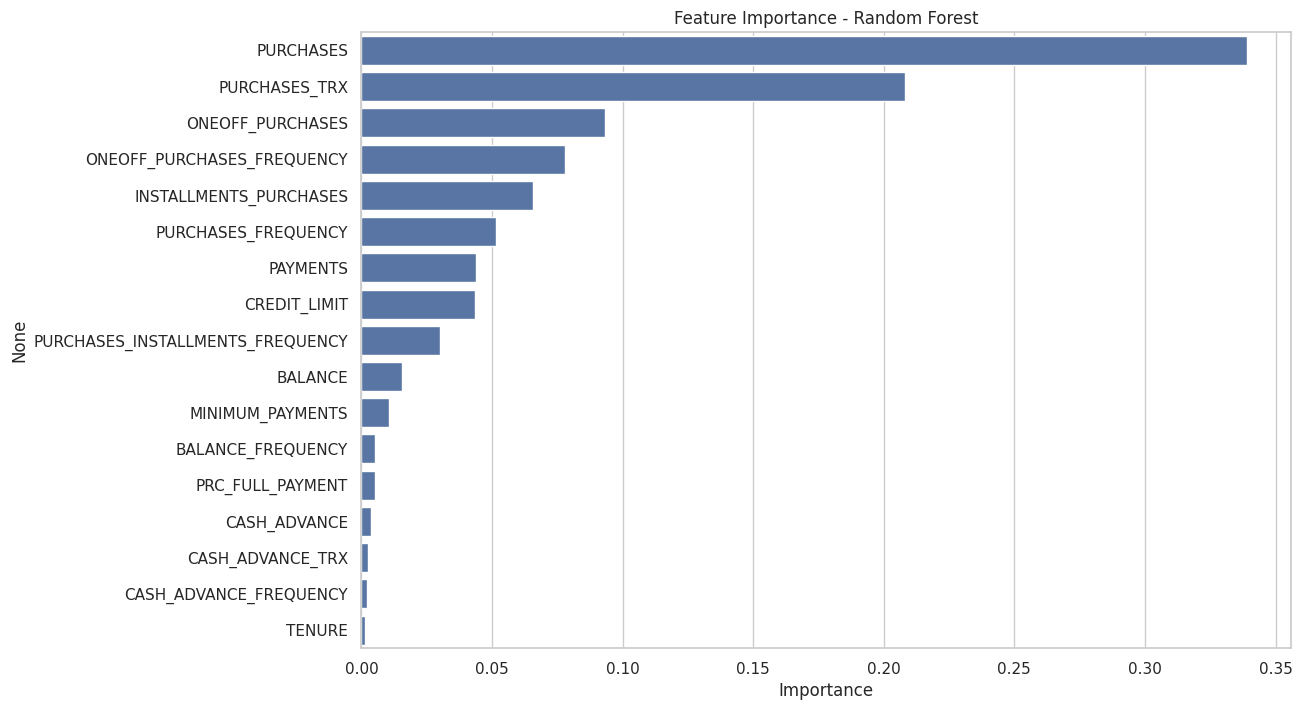

In [10]:
# Prediksi menggunakan model Random Forest yang telah di-tuning
y_pred_rf_best = rf_best.predict(X_test_scaled)

# Menghitung metrik evaluasi untuk Random Forest yang telah di-tuning
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
f1_macro_rf_best = f1_score(y_test, y_pred_rf_best, average='macro')
f1_weighted_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')

# Confusion matrix untuk Random Forest yang telah di-tuning
cm_rf_best = confusion_matrix(y_test, y_pred_rf_best)

# Menampilkan hasil evaluasi
print("\nHasil Evaluasi Random Forest (setelah tuning):")
print(f"Accuracy: {accuracy_rf_best:.4f}")
print(f"F1 Score (Macro): {f1_macro_rf_best:.4f}")
print(f"F1 Score (Weighted): {f1_weighted_rf_best:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_best))

# Visualisasi confusion matrix untuk Random Forest yang telah di-tuning
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf_best, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))],
            yticklabels=[f'Cluster {i}' for i in range(len(np.unique(y)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (After Tuning)')
plt.show()

# Perbandingan metrik evaluasi sebelum dan setelah tuning
models_comparison = ['Random Forest (Before)', 'Random Forest (After)']
accuracy_comparison = [accuracy_rf, accuracy_rf_best]
f1_macro_comparison = [f1_macro_rf, f1_macro_rf_best]
f1_weighted_comparison = [f1_weighted_rf, f1_weighted_rf_best]

# Visualisasi perbandingan metrik
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(models_comparison, accuracy_comparison, color=['lightgreen', 'forestgreen'])
plt.title('Accuracy')
plt.ylim(0.9, 1)

plt.subplot(1, 3, 2)
plt.bar(models_comparison, f1_macro_comparison, color=['lightgreen', 'forestgreen'])
plt.title('F1 Score (Macro)')
plt.ylim(0.9, 1)

plt.subplot(1, 3, 3)
plt.bar(models_comparison, f1_weighted_comparison, color=['lightgreen', 'forestgreen'])
plt.title('F1 Score (Weighted)')
plt.ylim(0.9, 1)

plt.tight_layout()
plt.show()

# Melihat feature importance dari model Random Forest terbaik
feature_importances = pd.DataFrame(
    rf_best.feature_importances_,
    index=X.columns,
    columns=['Importance']
).sort_values('Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. Perbandingan Model:
   - Decision Tree mencapai akurasi yang baik, tetapi sedikit lebih rendah dibandingkan Random Forest.
   - Random Forest secara konsisten menunjukkan performa yang lebih baik dalam semua metrik evaluasi (accuracy, F1-score).
   - Ini menunjukkan bahwa ensemble learning dari Random Forest efektif dalam menangani variasi dalam data.

2. Hasil Tuning:
   - Setelah hyperparameter tuning, model Random Forest menunjukkan peningkatan performa meskipun tidak signifikan.
   - Ini menunjukkan bahwa model Random Forest dasar sudah cukup kuat untuk tugas klasifikasi ini.
   - Parameter terbaik yang ditemukan melalui grid search memberikan keseimbangan antara kompleksitas model dan kemampuan generalisasi.

3. Feature Importance:
   - Fitur-fitur penting yang diidentifikasi oleh Random Forest memberikan wawasan tentang karakteristik yang paling mempengaruhi clustering.
   - Ini sejalan dengan analisis cluster sebelumnya yang menemukan perbedaan signifikan dalam pola penggunaan kartu kredit.

4. Prediksi per Cluster:
   - Confusion matrix menunjukkan bahwa model dapat memprediksi hampir semua cluster dengan baik.
   - Beberapa kesalahan klasifikasi mungkin terjadi karena adanya kemiripan karakteristik antara beberapa cluster.

5. Rekomendasi:
   - Model Random Forest dengan parameter optimal dapat digunakan untuk mengklasifikasikan pelanggan baru ke dalam segment yang tepat.
   - Sistem ini dapat diintegrasikan ke dalam pipeline bisnis untuk personalisasi layanan dan penawaran produk.
   - Untuk meningkatkan performa lebih lanjut, bisa dilakukan:
     a. Feature engineering untuk menciptakan fitur baru yang lebih diskriminatif
     b. Mencoba algoritma klasifikasi lain seperti Gradient Boosting atau XGBoost
     c. Ensemble beberapa model klasifikasi untuk meningkatkan stabilitas prediksi

6. Aplikasi Bisnis:
   - Dengan model klasifikasi ini, perusahaan dapat secara otomatis mengelompokkan pelanggan baru ke dalam segment yang sesuai.
   - Untuk Cluster 0 (Pengguna Kartu Kredit Aktif dengan Belanja Tinggi): Tawarkan program rewards dan cashback untuk pembelian.
   - Untuk Cluster 1 (Pengguna dengan Saldo Tinggi dan Advance Cash): Tawarkan program restrukturisasi hutang atau edukasi manajemen keuangan.
   - Untuk Cluster 2 (Pengguna Kartu Kredit Pasif dengan Limit Rendah): Berikan insentif untuk meningkatkan penggunaan kartu.
   - Untuk Cluster 3 (Pengguna dengan Cicilan Belanja): Tawarkan program cicilan khusus dengan bunga rendah.